In [1]:
import pandas 
import seaborn

import cltrier_lib

import twon_agents

In [2]:
SEED: int = 1

In [3]:
post_ids: pandas.DataFrame = (
    pandas.read_csv("../data/interim/twitter.german.posts.csv", index_col=0)
    [["id"]]
)
post_ids

,id
0,1640263711905423360
1,1629096801503420416
2,1632391902698827777
3,1628328481456025600
4,1618971719229915138
...,...
619,1618281922291195905
620,1632129891289186307
621,1626181900942422017
622,1653096231927783424


In [4]:
replies: pandas.DataFrame = (
    twon_agents.data.filter_tweets(
        pandas.read_csv("../data/raw/twitter.german/GermanyReplies2023.csv", index_col=0),
        remove_w_mentions=False
    )
    .merge(post_ids, left_on="conversation_id", right_on="id")
    .rename(columns={"id_x": "id"})
)
replies

,id,author_id,conversation_id,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,created_at,username,in_reply_to_user_id,id_y
0,1648551435536048128,1470873651239178259,1646481347278520320,"@n_roettgen So, dann ab in den Krieg mit Ihnen...",0,0,0,0,0,3,2023-04-19T04:57:45.000Z,n_roettgen,1040160799208161280,1646481347278520320
1,1615969329647951872,1510583749322448902,1615835738356031505,@n_roettgen Ich wünsche #Pistorius das Gleiche...,0,0,0,0,0,69,2023-01-19T07:08:06.000Z,n_roettgen,1040160799208161280,1615835738356031505
2,1616035922314932225,1397831007563403265,1615835738356031505,@n_roettgen Welchen Mehrwert liefern Sie eigen...,0,0,0,0,0,6,2023-01-19T11:32:43.000Z,n_roettgen,1040160799208161280,1615835738356031505
3,1613662747996069889,1590121680805978112,1613647373728718853,@n_roettgen The world government must listed I...,0,0,0,0,0,9,2023-01-12T22:22:34.000Z,n_roettgen,1040160799208161280,1613647373728718853
4,1616038592484196352,1594269577030107136,1615835738356031505,@n_roettgen Wenn Kriegstreiber wie Röntgen zu ...,0,0,0,0,0,2,2023-01-19T11:43:19.000Z,n_roettgen,1040160799208161280,1615835738356031505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91701,1615051224960696320,1351985241888534530,1614519432356958208,@MalteKaufmann Was erlauben Greta? 🤣🤣🤣,0,0,0,0,0,6,2023-01-16T18:19:52.000Z,MalteKaufmann,97530140,1614519432356958208
91702,1609956263428870147,1295365631748055044,1609821802993442816,"@MalteKaufmann Schön wärs, wenn man erfahren k...",0,1,1,0,0,53,2023-01-02T16:54:19.000Z,MalteKaufmann,97530140,1609821802993442816
91703,1614621374747656200,1481944130125246467,1614519432356958208,@MalteKaufmann Was lassen wir uns noch von der...,0,0,4,0,0,84,2023-01-15T13:51:48.000Z,MalteKaufmann,97530140,1614519432356958208
91704,1609958744473112583,153000722,1609821802993442816,@MalteKaufmann Ich habe viele Videos vom Silve...,0,4,1,0,0,90,2023-01-02T17:04:10.000Z,MalteKaufmann,97530140,1609821802993442816


In [5]:
# calculate the distribution of user activity (number of posts)
user_activity_dist: pandas.Series = replies["author_id"].value_counts().describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .96, .97, .98, .99, .995])
user_activity_dist

count    38188.000000
mean         2.401435
std          3.005037
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
80%          3.000000
85%          4.000000
90%          5.000000
95%          7.000000
96%          8.000000
97%         10.000000
98%         11.000000
99%         15.000000
99.5%       19.000000
max        116.000000
Name: count, dtype: float64

In [6]:
selected_percentile: str = "99%"

sampled_replies: pandas.DataFrame = (
    replies
    [   
        # select only the 40% most active users
        replies["author_id"].isin(
            list((replies["author_id"].value_counts() > user_activity_dist.loc[selected_percentile]).pipe(lambda _s : _s[_s]).index)
        )
    ]
    .groupby("author_id")
    # sample by number of least active 40%' user posts
    .sample(n=int(user_activity_dist.loc[selected_percentile]), random_state=SEED)
)

len(sampled_replies), len(sampled_replies["author_id"].unique())

(5220, 348)

In [7]:
sampled_replies

,id,author_id,conversation_id,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,created_at,username,in_reply_to_user_id,id_y
60884,1617114281132314624,15891726,1616701560431542272,@RKiesewetter Wussten das die CDU Verteidigung...,0,0,0,0,0,1,2023-01-22T10:57:43.000Z,RKiesewetter,42698498,1616701560431542272
69622,1620308520087199744,15891726,1620171503957581825,@StBrandner Da es keinen Staatsfunk gibt: Nein.,0,0,0,0,0,72,2023-01-31T06:30:29.000Z,StBrandner,713361366858481664,1620171503957581825
40706,1649890068067151878,15891726,1649820541207863300,"@f_schaeffler Steht da auch drinne, dass die D...",0,0,0,0,0,9,2023-04-22T21:37:00.000Z,f_schaeffler,18189342,1649820541207863300
67262,1610903010426908673,15891726,1610260317262471171,@katjadler Leute die Begriffe wie „kulturelle ...,0,0,0,0,0,21,2023-01-05T07:36:21.000Z,katjadler,712941191,1610260317262471171
69879,1657718828485206016,15891726,1657692554706534401,@StBrandner Oh doch. Zum Beispiel könnte eine ...,0,0,1,0,0,14,2023-05-14T12:05:42.000Z,StBrandner,713361366858481664,1657692554706534401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51732,1651852920076267520,1642154882693038081,1651619903105912833,@nyke_slawik Nein herrlich! Eventuell wählt di...,0,0,0,0,0,5,2023-04-28T07:36:40.000Z,nyke_slawik,3002271760,1651619903105912833
72765,1656330522694504450,1642154882693038081,1656250439224946688,@Tino_Chrupalla @RusBotschaft Das ZDF verstrah...,0,0,0,0,0,8,2023-05-10T16:09:04.000Z,Tino_Chrupalla,797137333820784640,1656250439224946688
62180,1660735964837183489,1642154882693038081,1660674403879755777,@GoeringEckardt @hartaberfair @DasErste Mit so...,0,0,0,0,0,25,2023-05-22T19:54:43.000Z,GoeringEckardt,626287930,1660674403879755777
72627,1645876119126810624,1642154882693038081,1645732899742703616,@Tino_Chrupalla Was zum Teufel sind eigentlich...,0,1,0,0,0,9,2023-04-11T19:47:00.000Z,Tino_Chrupalla,797137333820784640,1645732899742703616


In [20]:
(
    sampled_replies
    # remove linebreaks and mentions at beginning
    .assign(text=(
        sampled_replies["text"]
        .replace(r"\n"," ", regex=True)
        .replace(r"^@(\w){1,15}\s?(@(\w){1,15})*","", regex=True)
    ))
    [["id", "author_id", "conversation_id", "created_at", "text"]]
    .to_csv("../data/interim/twitter.german.replies.csv")
)

In [16]:
classified_data = pandas.json_normalize([sample.model_dump() for sample in  cltrier_lib.classify.Pipeline()(list(sampled_replies["text"]), threshold=0.)])
classified_data

,sample,results.topics.arts_&_culture,results.topics.business_&_entrepreneurs,results.topics.celebrity_&_pop_culture,results.topics.diaries_&_daily_life,results.topics.family,results.topics.fashion_&_style,results.topics.film_tv_&_video,results.topics.fitness_&_health,results.topics.food_&_dining,...,results.emotions.trust,results.sentiment.negative,results.sentiment.neutral,results.sentiment.positive,results.irony.non_irony,results.irony.irony,results.offensive.non-offensive,results.offensive.offensive,results.hate.NOT-HATE,results.hate.HATE
0,@RKiesewetter Wussten das die CDU Verteidigung...,0.010403,0.004250,0.017381,0.068277,0.001605,0.000734,0.011765,0.001554,0.000840,...,0.030379,0.270784,0.773874,0.374926,0.810347,0.285108,0.710429,0.309836,0.931027,0.080776
1,@StBrandner Da es keinen Staatsfunk gibt: Nein.,0.022527,0.006241,0.175455,0.079630,0.001431,0.005069,0.109173,0.001740,0.000917,...,0.011219,0.262889,0.737343,0.396053,0.827131,0.316757,0.713729,0.307276,0.920231,0.082769
2,"@f_schaeffler Steht da auch drinne, dass die D...",0.096684,0.008564,0.033465,0.211034,0.004652,0.003375,0.010797,0.003691,0.001490,...,0.026807,0.238850,0.750003,0.450912,0.885061,0.194130,0.739730,0.279449,0.948221,0.059228
3,@katjadler Leute die Begriffe wie „kulturelle ...,0.043447,0.003945,0.159271,0.141028,0.011590,0.001960,0.105020,0.004714,0.001554,...,0.008653,0.399478,0.719105,0.293288,0.793308,0.310786,0.665345,0.350036,0.886828,0.108899
4,@StBrandner Oh doch. Zum Beispiel könnte eine ...,0.055064,0.006693,0.132551,0.016529,0.002345,0.005889,0.022203,0.004730,0.001238,...,0.039536,0.264005,0.747439,0.410508,0.726433,0.366130,0.688613,0.331351,0.945741,0.061119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,@nyke_slawik Nein herrlich! Eventuell wählt di...,0.013116,0.009059,0.028200,0.042101,0.001510,0.001874,0.012149,0.001188,0.000672,...,0.058914,0.162306,0.727314,0.622772,0.816428,0.267064,0.744944,0.269698,0.955697,0.044004
5216,@Tino_Chrupalla @RusBotschaft Das ZDF verstrah...,0.077125,0.015609,0.017731,0.078705,0.001460,0.004026,0.027874,0.001110,0.001389,...,0.028390,0.108666,0.594224,0.832509,0.680777,0.416570,0.710064,0.295652,0.908470,0.098297
5217,@GoeringEckardt @hartaberfair @DasErste Mit so...,0.038423,0.008604,0.027372,0.292372,0.002446,0.003985,0.009152,0.002418,0.003118,...,0.045368,0.175892,0.761234,0.533312,0.820887,0.244813,0.748947,0.271437,0.950803,0.055427
5218,@Tino_Chrupalla Was zum Teufel sind eigentlich...,0.102737,0.144527,0.012784,0.213372,0.004211,0.008295,0.020930,0.001312,0.012716,...,0.025128,0.277564,0.864931,0.253881,0.860845,0.226521,0.744517,0.269264,0.941371,0.063817


<Axes: xlabel='value', ylabel='variable'>

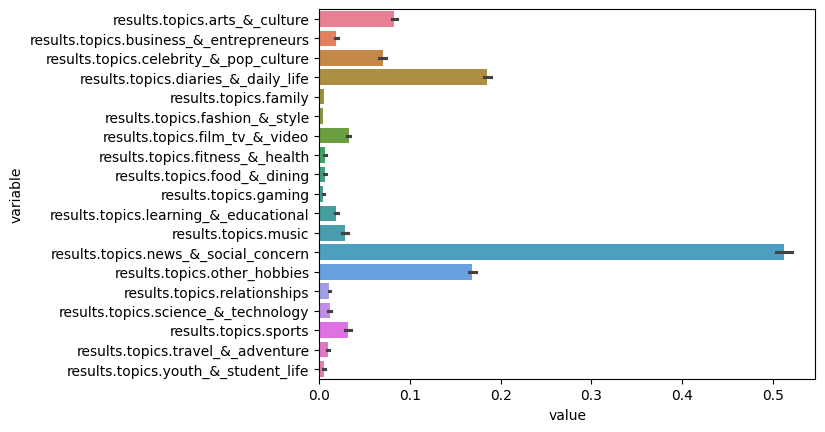

In [17]:
seaborn.barplot(
    classified_data.filter(like=".topics.").melt(),
    x="value", y="variable", hue="variable",
)

<Axes: xlabel='value', ylabel='variable'>

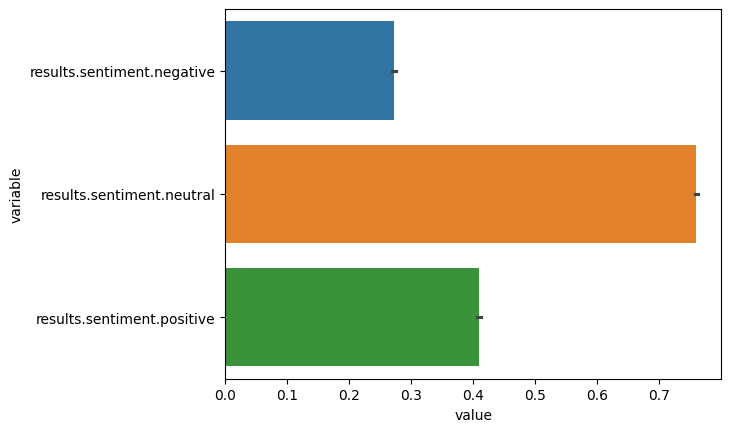

In [18]:
seaborn.barplot(
    classified_data.filter(like=".sentiment.").melt(),
    x="value", y="variable", hue="variable",
)

<Axes: xlabel='value', ylabel='variable'>

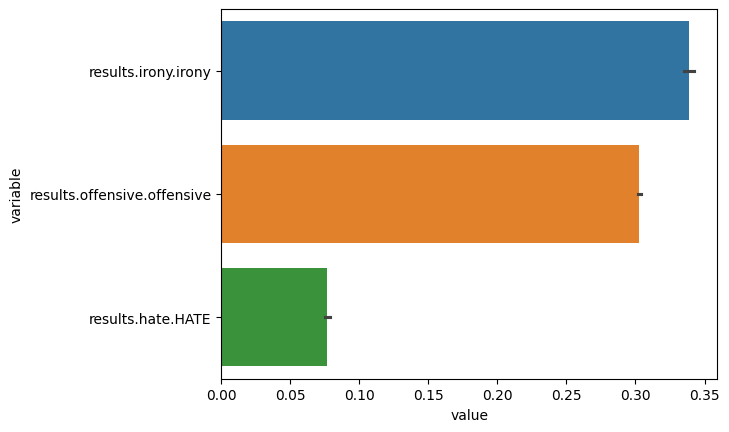

In [19]:
seaborn.barplot(
    classified_data.filter(regex="irony\.irony|offensive\.offensive|hate\.HATE").melt(),
    x="value", y="variable", hue="variable",
)